Processed 1365/5000 images


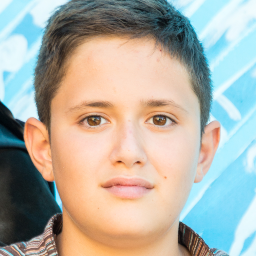

Button(description='Left', style=ButtonStyle())

Button(description='Right', style=ButtonStyle())

Button(description='IDK', style=ButtonStyle())

In [4]:
import os
import cv2
from IPython.display import display, Image, clear_output
import ipywidgets as widgets

# Function to find PNG images in subdirectories
def find_png_images(root_dir):
    png_files = []
    for dirpath, _, filenames in os.walk(root_dir):
        for filename in filenames:
            if filename.lower().endswith('.png'):
                png_files.append(os.path.join(dirpath, filename))
    return sorted(png_files)

# Function to resize image to 256x256
def resize_image(image_path):
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, (256, 256))
    return resized_image

# Function to display image and handle button clicks
def display_image(image_path, image, callback):
    _, encoded_image = cv2.imencode('.png', image)
    display(Image(data=encoded_image))
    
    left_button = widgets.Button(description="Left")
    right_button = widgets.Button(description="Right")
    idk_button = widgets.Button(description="IDK")
    
    display(left_button, right_button, idk_button)
    
    def on_left_button_clicked(b):
        write_to_file(image_path, "Left", "filter-left.txt")
        callback()
    
    def on_right_button_clicked(b):
        write_to_file(image_path, "Right", "filter-right.txt")
        callback()

    
    def on_idk_button_clicked(b):
        write_to_file(image_path, "IDK", "filter-idk.txt")
        callback()
    
    left_button.on_click(on_left_button_clicked)
    right_button.on_click(on_right_button_clicked)
    idk_button.on_click(on_idk_button_clicked)

# Function to write to file
def write_to_file(image_path, direction, fname="filter.txt"):
    subdir_name = os.path.basename(os.path.dirname(image_path))
    file_name = os.path.splitext(os.path.basename(image_path))[0]
    with open(fname, "a") as file:
        file.write(f"{subdir_name}/{file_name}\n")

def create_prompt(png_images):
    idx = 1366
    def callback():
        clear_output()
        nonlocal idx
        print(f"Processed {idx}/{len(png_images)} images")
        idx += 1
        if idx < len(png_images):
            create_block()
        else:
            print("All images processed!")

    def create_block():
        image_path = png_images[idx]
        resized_image = resize_image(image_path)
        display_image(image_path, resized_image, callback)
    create_block()

# Main function
def main(root_dir):
    png_images = find_png_images(root_dir)
    create_prompt(png_images)
    
# Provide the root directory containing subdirectories with PNG images
root_dir = "datasets/face/face2000_single/images"
main(root_dir)